## Looqbox Data Challenge

In [1]:
import mysql.connector

mydb = mysql.connector.connect(
  database='looqbox_challenge',
  host="35.199.127.241",
  user="looqbox-challenge",
  password="looq-challenge"
)

cursor = mydb.cursor()

### 1. How many products does the company have?

In [2]:
cursor.execute("SELECT COUNT(product_cod) FROM data_product;")

result = cursor.fetchall()

print(result[0][0])

9994


### 2. What are the 10 most expensive products in the company?

In [3]:
cursor.execute("SELECT product_name, product_val FROM data_product ORDER BY product_val DESC LIMIT 10;")

result = cursor.fetchall()

for i in result:
    print('{} - {}'.format(i[0], i[1]))


Whisky Escoces THE MACALLAN Ruby Garrafa 700ml com Caixa - 741.99
Whisky Escoces JOHNNIE WALKER Blue Label Garrafa 750ml - 735.90
Cafeteira Expresso 3 CORACOES Tres Modo Vermelho - 499.00
Vinho Portugues Tinto Vintage QUINTA DO CRASTO Garrafa 750ml - 445.90
Escova Dental Eletrica ORAL B D34 Professional Care 5000 110v - 399.90
Champagne Rose VEUVE CLICQUOT PONSARDIM Garrafa 750ml - 366.90
Champagne Frances Brut Imperial MOET Rose Garrafa 750ml - 359.90
Conjunto de Panelas Allegra em Inox TRAMONTINA 5 Pecas Gratis Utensilios 5 Pecas - 359.00
Whisky Escoces CHIVAS REGAL 18 Anos Garrafa 750ml - 329.90
Champagne Frances Brut Imperial MOET & CHANDON Garrafa 750ml - 315.90


### 3. What sections do the 'BEBIDAS' and 'PADARIA' departments have?

In [16]:
cursor.execute("SELECT DISTINCT section_name, dep_name FROM data_product WHERE dep_name = 'BEBIDAS' or dep_name = 'PADARIA';")

result = cursor.fetchall()

for i in result:
    print(i)



('BEBIDAS', 'BEBIDAS')
('VINHOS', 'BEBIDAS')
('DOCES-E-SOBREMESAS', 'PADARIA')
('QUEIJOS-E-FRIOS', 'PADARIA')
('CERVEJAS', 'BEBIDAS')
('PADARIA', 'PADARIA')
('REFRESCOS', 'BEBIDAS')
('GESTANTE', 'PADARIA')


### 4. When were the most products sold? In which store?

In [5]:
cursor.execute('''
SELECT dps.date, dsc.store_name 
FROM data_product_sales as dps 
JOIN data_store_cad as dsc on dps.store_code = dsc.store_code 
ORDER BY dps.sales_qty desc LIMIT 1;
''')

result = cursor.fetchall()

for i in result:
    print('{} - {}'.format(i[0].strftime('%d/%m/%Y'), i[1]))

20/02/2019 - Rio de Janeiro


### 5. Bonus!! What was the total sale of products of each business area in the first quarter of 2019?

In [6]:
cursor.execute('''
SELECT FORMAT(sum(dss.sales_value),2), dsc.business_name 
FROM data_store_sales AS dss
JOIN data_store_cad AS dsc ON dsc.store_code = dss.store_code 
WHERE dss.date BETWEEN '2018-12-31 00:00:00' and '2019-03-31 23:59:00' 
GROUP BY business_name;
''')

#Reescrever Celula
result = cursor.fetchall()

for i in result:
    print(i)

('80,965,451.68', 'Atacado')
('82,108,799.55', 'Farma')
('32,349,573.20', 'Posto')
('80,751,689.88', 'Proximidade')
('81,467,772.96', 'Varejo')


### Create at least one chart using the table IMDB_movies. The code must be in R or Python, and you are free to use any libraries, data in the table and graphic format.

In [7]:
cursor.execute('''
SELECT imdb.Title, info.Year, info.max_revenue
FROM (SELECT Year, MAX(RevenueMillions) AS max_revenue
FROM IMDB_movies
GROUP BY Year) AS info
JOIN IMDB_movies AS imdb ON imdb.Year = info.Year AND imdb.RevenueMillions = info.max_revenue
ORDER BY info.Year 
''')

result = cursor.fetchall()

titles = [i[0] for i in result]
year = [int(i[1]) for i in result]
revenue = [int(i[2]) for i in result]


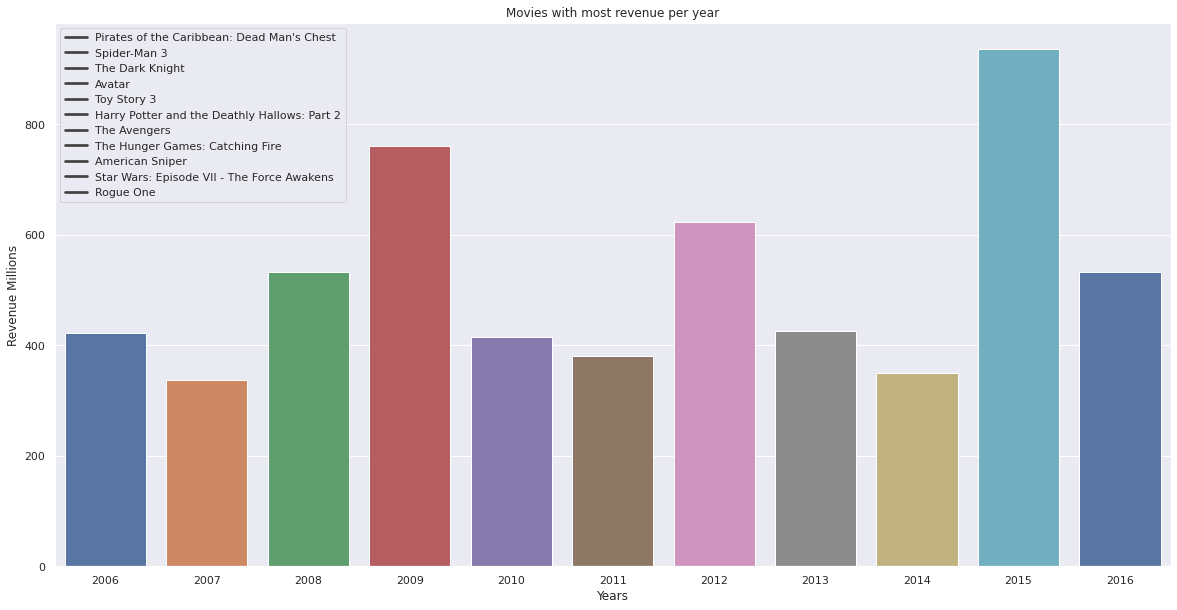

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x = year,y = revenue,  palette = 'deep', hue_order=titles)
sns.set(rc={'figure.figsize':(20,10)})
plt.xlabel("Years")
plt.ylabel("Revenue Millions")
# place the legend outside the figure/plot
plt.legend(titles)
plt.title("Movies with most revenue per year")
plt.show()